In [1]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv("/kaggle/input/dataset/train.csv")
test_df = pd.read_csv("/kaggle/input/dataset/test.csv")

# Handle missing values for 'Age' column in both train and test datasets
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

# Handle missing values for 'Fare' column in both train and test datasets
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# Drop Cabin column (too many missing values)
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

# Feature engineering - Create FamilySize feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Encode categorical variables (Sex and Embarked)
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = scaler.transform(test_df[['Age', 'Fare']])

# Final Data Preparation
drop_columns = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']
train_df.drop(drop_columns, axis=1, inplace=True)
test_df.drop(drop_columns, axis=1, inplace=True)

# Separate features and target variable
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df

# Check final data before modeling
print(X_train.head())


   Pclass       Age      Fare  FamilySize  Sex_female  Sex_male  Embarked_C  \
0       3 -0.565736 -0.502445           2       False      True       False   
1       1  0.663861  0.786845           2        True     False        True   
2       3 -0.258337 -0.488854           1        True     False       False   
3       1  0.433312  0.420730           2        True     False       False   
4       3  0.433312 -0.486337           1       False      True       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


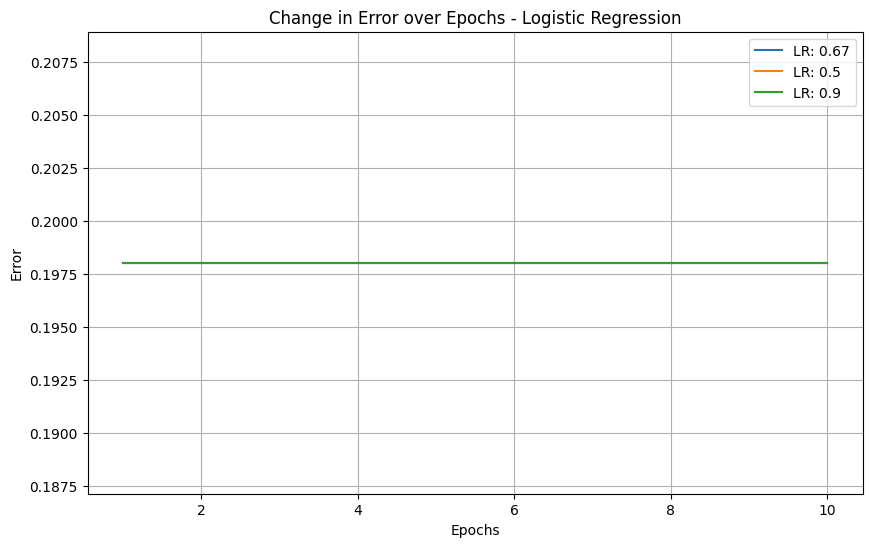

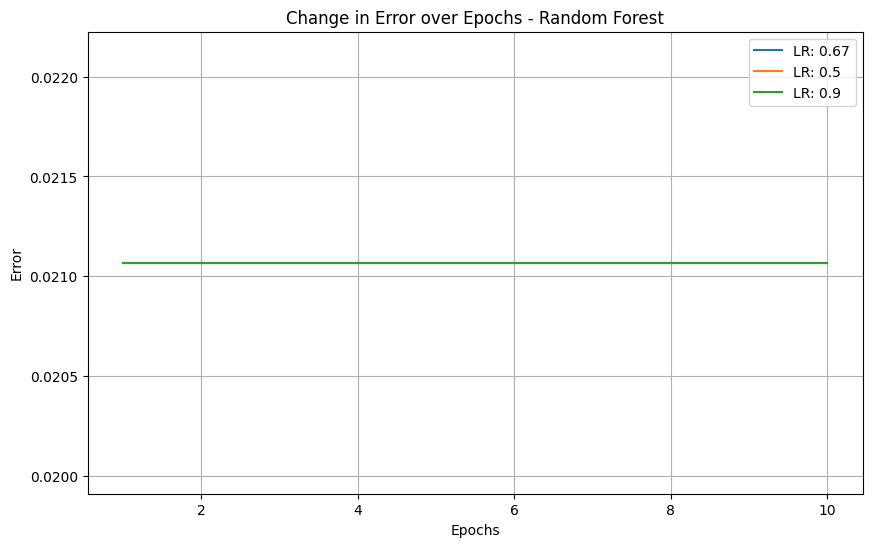

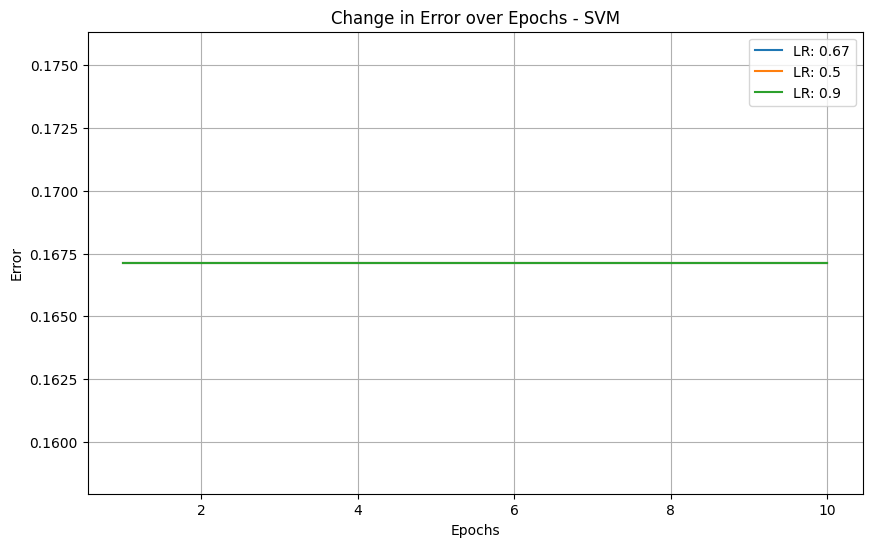

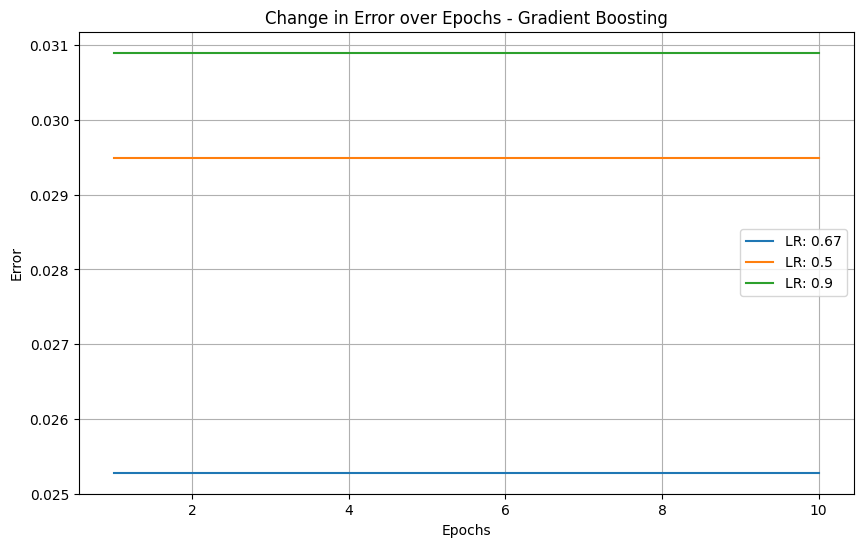

,Model,Learning Rate,Avg Train Accuracy,Avg Validation Accuracy
0,Logistic Regression,0.670000,0.801966,0.804469
1,Logistic Regression,0.500000,0.801966,0.804469
2,Logistic Regression,0.900000,0.801966,0.804469
3,Random Forest,0.670000,0.978933,0.812291
4,Random Forest,0.500000,0.978933,0.816201
5,Random Forest,0.900000,0.978933,0.818436
6,SVM,0.670000,0.832865,0.810056
7,SVM,0.500000,0.832865,0.810056
8,SVM,0.900000,0.832865,0.810056
9,Gradient Boosting,0.670000,0.974719,0.813408


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
train_df = pd.read_csv("/kaggle/input/dataset/train.csv")
test_df = pd.read_csv("/kaggle/input/dataset/test.csv")

# Handle missing values for 'Age' column in both train and test datasets
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

# Handle missing values for 'Fare' column in both train and test datasets
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# Drop Cabin column (too many missing values)
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

# Feature engineering - Create FamilySize feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Encode categorical variables (Sex and Embarked)
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = scaler.transform(test_df[['Age', 'Fare']])

# Final Data Preparation
drop_columns = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']
train_df.drop(drop_columns, axis=1, inplace=True)
test_df.drop(drop_columns, axis=1, inplace=True)

# Separate features and target variable
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df

# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize models with different hyperparameters
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Initialize parameters for hyperparameter tuning
epochs = 10
learning_rates = [0.67, 0.5, 0.9]
results = []

# Hyperparameter tuning
for name, model in models.items():
    plt.figure(figsize=(10, 6))  # Create a single plot for each model
    
    for lr in learning_rates:
        # Reinitialize model for each learning rate iteration
        model_instance = model.__class__(**model.get_params())
        if isinstance(model_instance, GradientBoostingClassifier):
            model_instance.set_params(learning_rate=lr)
        train_accuracies = []
        val_accuracies = []
        error_data = []
        for epoch in range(epochs):
            model_instance.fit(X_train, y_train)
            train_pred = model_instance.predict(X_train)
            val_pred = model_instance.predict(X_val)
            train_acc = accuracy_score(y_train, train_pred)
            val_acc = accuracy_score(y_val, val_pred)
            train_accuracies.append(train_acc)
            val_accuracies.append(val_acc)
            loss = 1 - train_acc
            error_data.append(loss)
        avg_train_acc = np.mean(train_accuracies)
        avg_val_acc = np.mean(val_accuracies)
        results.append((name, lr, avg_train_acc, avg_val_acc))
        
        # Plot change in error over iterations
        plt.plot(range(1, epochs + 1), error_data, label=f'LR: {lr}')  # Plot each learning rate with a different color
        
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Change in Error over Epochs - {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create a DataFrame to display results
results_df = pd.DataFrame(results, columns=['Model', 'Learning Rate', 'Avg Train Accuracy', 'Avg Validation Accuracy'])

# Highlight the best result
best_result = results_df.loc[results_df['Avg Validation Accuracy'].idxmax()]
results_df.style.apply(lambda x: ['background: lightgreen' if x.name == best_result.name else '' for i in x], axis=1)


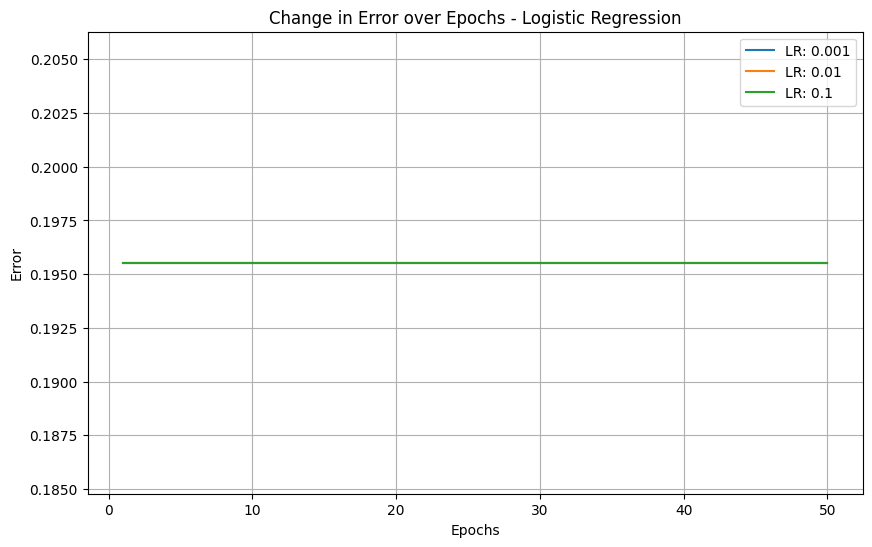

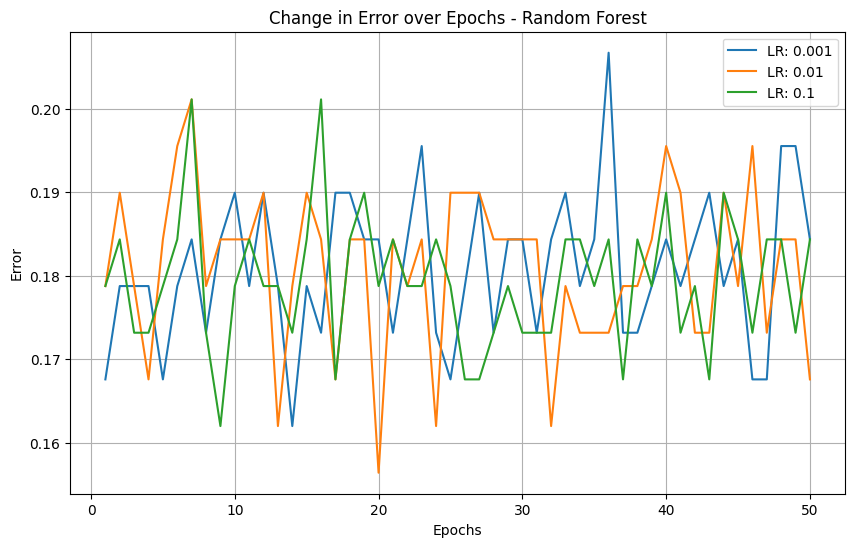

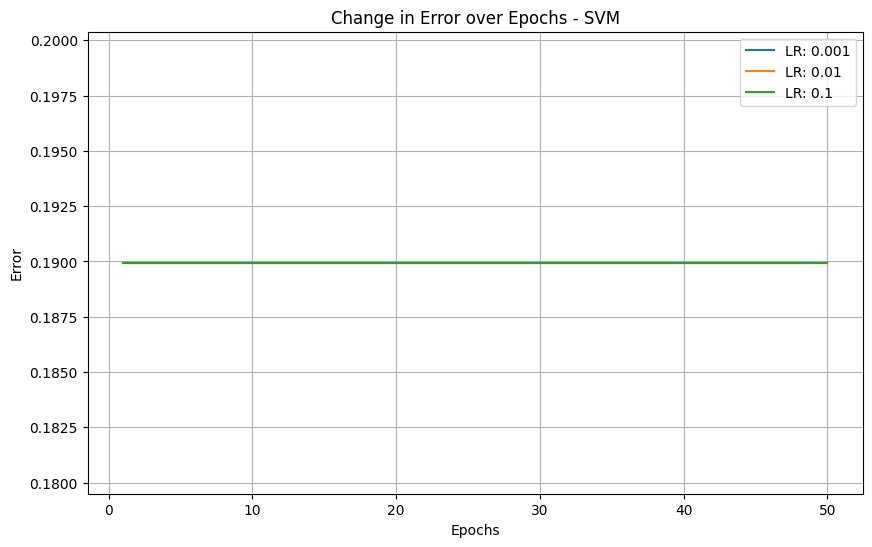

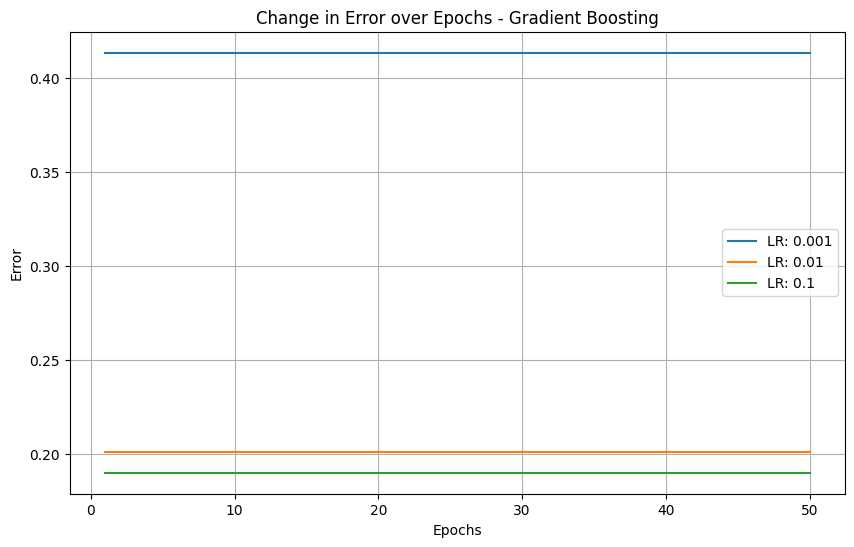

,Model,Learning Rate,Avg Train Accuracy,Avg Validation Accuracy
0,Logistic Regression,0.100000,0.801966,0.804469
1,Random Forest,0.100000,0.978876,0.820670
2,SVM,0.100000,0.832865,0.810056
3,Gradient Boosting,0.100000,0.903090,0.810056


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
train_df = pd.read_csv("/kaggle/input/dataset/train.csv")
test_df = pd.read_csv("/kaggle/input/dataset/test.csv")

# Handle missing values for 'Age' column in both train and test datasets
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

# Handle missing values for 'Fare' column in both train and test datasets
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# Drop Cabin column (too many missing values)
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

# Feature engineering - Create FamilySize feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Encode categorical variables (Sex and Embarked)
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])
test_df[['Age', 'Fare']] = scaler.transform(test_df[['Age', 'Fare']])

# Final Data Preparation
drop_columns = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']
train_df.drop(drop_columns, axis=1, inplace=True)
test_df.drop(drop_columns, axis=1, inplace=True)

# Separate features and target variable
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize models with different hyperparameters
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Initialize parameters for hyperparameter tuning
epochs = 50
learning_rates = [0.001, 0.01, 0.1]
results = []

# Hyperparameter tuning and plotting
for name, model in models.items():
    plt.figure(figsize=(10, 6))  # Create a single plot for each model
    for lr in learning_rates:
        # Reinitialize model for each learning rate iteration
        model_instance = model.__class__(**model.get_params())
        if isinstance(model_instance, GradientBoostingClassifier):
            model_instance.set_params(learning_rate=lr)
        train_errors = []
        val_errors = []
        for epoch in range(epochs):
            model_instance.fit(X_train, y_train)
            train_pred = model_instance.predict(X_train)
            val_pred = model_instance.predict(X_val)
            train_acc = accuracy_score(y_train, train_pred)
            val_acc = accuracy_score(y_val, val_pred)
            train_errors.append(1 - train_acc)  # Training error
            val_errors.append(1 - val_acc)      # Validation error
        
        # Plot change in error over epochs
        plt.plot(range(1, epochs + 1), val_errors, label=f'LR: {lr}')  # Plot each learning rate with a different color
    
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Change in Error over Epochs - {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Append results for the current model to the results list
    avg_train_acc = 1 - np.mean(train_errors)
    avg_val_acc = 1 - np.mean(val_errors)
    results.append((name, lr, avg_train_acc, avg_val_acc))

    # Create a DataFrame to display results
results_df = pd.DataFrame(results, columns=['Model', 'Learning Rate', 'Avg Train Accuracy', 'Avg Validation Accuracy'])

# Highlight the best result
best_result = results_df.loc[results_df['Avg Validation Accuracy'].idxmax()]
results_df.style.apply(lambda x: ['background: lightgreen' if x.name == best_result.name else '' for i in x], axis=1)
